category,food,fun,living,transport,savings,education
2024-05,0.0,0.0,100000.0,0.0,0.0,0.0
2024-06,7.0,17.0,0.0,0.0,0.0,0.0
ALL,7.0,17.0,100000.0,0.0,0.0,0.0


In [1]:
from personal_finance import PersonalFinance

pf = PersonalFinance('user')
pf.load()

pf.daily_totals

,date,amount
0,2024-05-27,321.79
1,2024-05-28,23.57
2,2024-05-29,29.44
3,2024-05-30,6.26
4,2024-05-31,17.34
5,2024-06-01,1216.01


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2024-05-27'),
  Text(1, 0, '2024-05-28'),
  Text(2, 0, '2024-05-29'),
  Text(3, 0, '2024-05-30'),
  Text(4, 0, '2024-05-31'),
  Text(5, 0, '2024-06-01')])

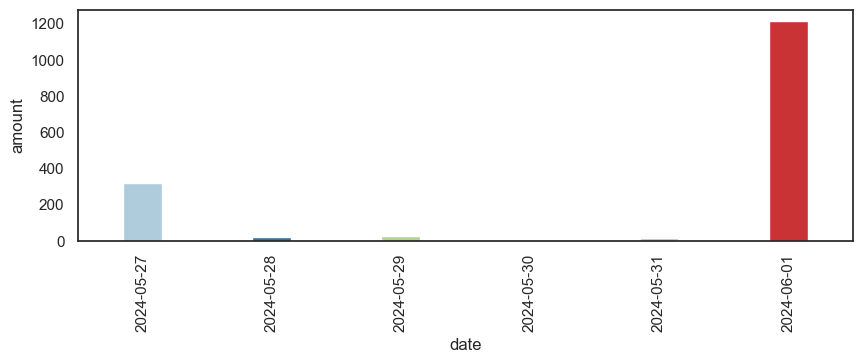

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

daily_totals = pf.daily_totals
daily_totals['date'] = daily_totals['date'].apply(lambda date: str(date)[:10])

plt.figure(figsize=(10, 3))
sns.set_theme(style='white', color_codes=True)
sns.set_palette('Paired')
sns.barplot(data=pf.daily_totals, x='date', y='amount', width = 0.3)
plt.xticks(rotation=90)

In [12]:
mt = pf.monthly_totals

In [20]:


from pandas import Period

mt.loc[Period('2024-05', 'M')]

category
food              0.0
fun               0.0
living       100000.0
transport         0.0
savings           0.0
education         0.0
Name: 2024-05, dtype: float64

In [29]:
dat = pf.data

In [33]:
dat.drop(index = 3)

,date,category,title,amount,notes
0,2024-06-01,food,gongcha,7.0,taro bubble tea fye
1,2024-06-01,fun,cloud9,17.0,zaza
2,2024-06-01,fun,travel goods,10.0,travel goods from target


In [34]:
dat

,date,category,title,amount,notes
0,2024-06-01,food,gongcha,7.0,taro bubble tea fye
1,2024-06-01,fun,cloud9,17.0,zaza
2,2024-06-01,fun,travel goods,10.0,travel goods from target
3,2024-05-15,living,test,100000.0,hi


In [153]:
"""
PersonalFinance class, define with person's name
attrib .data: a pandas DataFrame with entries, columns: ['date', 'category', 'title', 'amount', 'notes']
attrib .barchart: barchart in the form of a DataFrame, with the category, category sum ('amount'), and height (log scale of amount)

 ／l、
（ﾟ､ ｡ ７
  l  ~ヽ
  じしf_,)ノ
"""

import pandas as pd
from datetime import datetime as dt
import numpy as np
import os

class PersonalFinance:
    def __init__(self, name: str):
        self.name = name
        # initialize dataframe with these columns
        self.data = pd.DataFrame(columns=['date', 'category', 'title', 'amount', 'notes'])

        # dataframe for totals is stored here. also includes month
        self._cat_totals = pd.DataFrame(columns=['category', 'amount'])

    def new_entry(self, date: dt.date, category: str, title: str, amount: float, notes: str = ' ') -> None:
        new_row = pd.DataFrame([{
            'date': date,
            'category': category,
            'title': title,
            'amount': amount,
            'notes': notes
        }])
        self.data = pd.concat([self.data, new_row], ignore_index=True)

    @property
    def _temp_data(self) -> pd.DataFrame:
        # data with month, internally stored because redundant w date
        df = self.data.copy()
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.to_period('M')
        return df

    @property
    def cat_totals(self) -> pd.DataFrame | None:
        # totals by category irrespective of month
        if not self._temp_data.empty:
            # df = self._temp_data['amount'].apply(lambda amt: float(amt)) # make sure all in float
            return self._temp_data[['category', 'amount']].groupby('category').sum().reset_index()
        else:
            return None
        
    def monthly_cat_totals(self, month: Period) -> pd.DataFrame | None:
        if month in list(set(self._temp_data['month'])):
            return self._temp_data[self._temp_data['month'] == month][['category', 'amount']].groupby('category').sum().reset_index()
        else:
            return self.cat_totals
            
        
            

    def delete_index(self, index: int) -> None:
        if index in self.data.index:
            self.data = self.data.drop(index=index)
            self.data = self.data.reset_index(drop=True)[['date', 'category', 'title', 'amount', 'notes']]
        else:
            raise IndexError('Index not found')

    def dump(self) -> None:
        self.data.to_csv(f'personal_finance_{self.name}.csv', index=False)

    def load(self) -> None:
        assert os.path.exists(f'personal_finance_{self.name}.csv')
        self.data = pd.read_csv(f'personal_finance_{self.name}.csv')[['date', 'category', 'title', 'amount', 'notes']]
        self.data['date'] = self.data['date'].apply(lambda date: date[:10])
        self.data['date'] = pd.to_datetime(self.data['date'])
        self._cat_totals = pd.DataFrame(columns=['category', 'amount'])




In [154]:
pf = PersonalFinance('user'); pf.load()
pf.cat_totals

,category,amount
0,food,73.23
1,fun,26.58
2,living,16.20


In [156]:
pf.monthly_cat_totals(month = Period('2024-05', 'M'))

,category,amount
0,food,73.23
1,fun,26.58
2,living,16.20


In [125]:
all_df = pd.DataFrame({'category': sorted(['living', 'food', 'transport', 'fun', 'education', 'savings']), 'amount': [0, 0, 0, 0, 0, 0]})

for month, df in pf.monthly_totals.items():
    for category in df.index:
        all_df.loc[category] = df.loc[category]
all_df

,category,amount
0,education,0.00
1,food,0.00
2,fun,0.00
3,living,0.00
4,savings,0.00
5,transport,0.00
food,NaN,73.23
fun,NaN,26.58
living,NaN,16.20


In [107]:
pf.monthly_totals[Period('2024-06', 'M')].reset_index(drop=True)['amount']

0    73.23
1    26.58
2    16.20
Name: amount, dtype: float64

In [ ]:
"""
PersonalFinance class, define with person's name
attrib .data: a pandas DataFrame with entries, columns: ['date', 'category', 'title', 'amount', 'notes']
attrib .barchart: barchart in the form of a DataFrame, with the category, category sum ('amount'), and height (log scale of amount)

 ／l、
（ﾟ､ ｡ ７
  l  ~ヽ
  じしf_,)ノ
"""

import pandas as pd
from datetime import datetime as dt
import numpy as np
import os

class PersonalFinance:
    def __init__(self, name: str):
        self.name = name
        # initialize dataframe with these columns
        self.data = pd.DataFrame(columns=['date', 'category', 'title', 'amount', 'notes'])

        # dataframe for totals is stored here. also includes month
        self._cat_totals = pd.DataFrame(columns=['category', 'amount'])

    def new_entry(self, date: dt.date, category: str, title: str, amount: float, notes: str = ' ') -> None:
        new_row = pd.DataFrame([{
            'date': date,
            'category': category,
            'title': title,
            'amount': amount,
            'notes': notes
        }])
        self.data = pd.concat([self.data, new_row], ignore_index=True)

    @property
    def _temp_data(self) -> pd.DataFrame:
        # data with month, internally stored because redundant w date
        df = self.data.copy()
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.to_period('M')
        return df

    @property
    def cat_totals(self) -> pd.DataFrame | None:
        # totals by category irrespective of month
        if not self.data.empty:
            self.data['amount'].apply(lambda amt: float(amt)) # make sure all in float
            return self.data[['category', 'amount']].groupby('category').sum().reset_index()
        else:
            return None

    @property
    def monthly_totals(self) -> pd.DataFrame | None:
        # totals for each month, per category
        if not self.data.empty:
            monthly = self._temp_data.pivot_table(
                index='month',
                columns='category',
                values='amount',
                aggfunc='first',
                fill_value=0
            )
            for col in ['food', 'fun', 'living', 'transport', 'savings', 'education']:
                if col not in list(monthly.columns):
                    monthly[col] = 0.00 # fill in empty categories with 0.00

            # add 'ALL' row
            all_row = monthly.sum().to_frame().T
            all_row.index = ['ALL']
            return pd.concat([monthly, all_row])
        else:
            None

    def delete_index(self, index: int) -> None:
        if index in self.data.index:
            self.data = self.data.drop(index=index)
            self.data = self.data.reset_index(drop=True)
        else:
            raise IndexError('Index not found')

    def dump(self) -> None:
        self.data.to_csv(f'personal_finance_{self.name}.csv', index=False)

    def load(self) -> None:
        assert os.path.exists(f'personal_finance_{self.name}.csv')
        self.data = pd.read_csv(f'personal_finance_{self.name}.csv')
        self.data['date'] = self.data['date'].apply(lambda date: date[:10])
        self.data['date'] = pd.to_datetime(self.data['date'])
        self._cat_totals = pd.DataFrame(columns=['category', 'amount'])


